# Task 1: Data preparation and customer analytics

In [108]:
import pandas as pd
import numpy as np

## Load dataset QVI_purchase_behaviour.csv
### Exploratory data analysis pb (purchase_behaviour)

In [109]:
file_path = '/Users/irasafonik/Desktop/quant/QVI_purchase_behaviour.csv'

pb = pd.read_csv(file_path)

pb.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [110]:
pb.info

<bound method DataFrame.info of        LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]>

In [111]:
pb.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [112]:
print("\nТипи даних для датасету QVI_purchase_behaviour:")
pb.dtypes


Типи даних для датасету QVI_purchase_behaviour:


LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

## Load dataset QVI_transaction_data.xlsx
### Exploratory data analysis td (transaction_data)

In [113]:
file_path = '/Users/irasafonik/Desktop/quant/QVI_transaction_data.xlsx'

td = pd.read_excel(file_path)

td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [114]:
td.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [115]:
td.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [116]:
print("\nТипи даних для датасету QVI_transaction_data:")
td.dtypes


Типи даних для датасету QVI_transaction_data:


DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

### Convert DATE to date format

In [117]:
import datetime

# Переведення числового значення у формат дати та часу
excel_date = 43390
date_time = datetime.datetime(1899, 12, 30) + datetime.timedelta(days=excel_date)

# Вивід результату
print("Дата та час, відповідні числовому значенню 43390:")
print(date_time)

Дата та час, відповідні числовому значенню 43390:
2018-10-17 00:00:00


In [118]:
# Переведення стовпця DATE у формат дати та часу
td['DATE'] = pd.to_datetime(td['DATE'], origin='1899-12-30', unit='D')
td.tail(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264827,2018-08-28,272,272197,269911,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6
264828,2018-07-27,272,272236,269974,68,Pringles Chicken Salt Crips 134g,2,7.4
264829,2019-03-16,272,272236,269976,49,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,2018-09-22,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


### Examine PROD_NAME

In [119]:
# Виведення кожного унікального рядка стовпця 'PROD_NAME'
unique_prod_names = td['PROD_NAME'].unique()
for prod_name in unique_prod_names:
    print(prod_name)

Natural Chip        Compny SeaSalt175g
CCs Nacho Cheese    175g
Smiths Crinkle Cut  Chips Chicken 170g
Smiths Chip Thinly  S/Cream&Onion 175g
Kettle Tortilla ChpsHny&Jlpno Chili 150g
Old El Paso Salsa   Dip Tomato Mild 300g
Smiths Crinkle Chips Salt & Vinegar 330g
Grain Waves         Sweet Chilli 210g
Doritos Corn Chip Mexican Jalapeno 150g
Grain Waves Sour    Cream&Chives 210G
Kettle Sensations   Siracha Lime 150g
Twisties Cheese     270g
WW Crinkle Cut      Chicken 175g
Thins Chips Light&  Tangy 175g
CCs Original 175g
Burger Rings 220g
NCC Sour Cream &    Garden Chives 175g
Doritos Corn Chip Southern Chicken 150g
Cheezels Cheese Box 125g
Smiths Crinkle      Original 330g
Infzns Crn Crnchers Tangy Gcamole 110g
Kettle Sea Salt     And Vinegar 175g
Smiths Chip Thinly  Cut Original 175g
Kettle Original 175g
Red Rock Deli Thai  Chilli&Lime 150g
Pringles Sthrn FriedChicken 134g
Pringles Sweet&Spcy BBQ 134g
Red Rock Deli SR    Salsa & Mzzrlla 150g
Thins Chips         Originl saltd 175g
Red 

In [120]:
unique_count = td['PROD_NAME'].nunique()
print("Кількість унікальних значень у стовпці 'PROD_NAME':", unique_count)

Кількість унікальних значень у стовпці 'PROD_NAME': 114


#### Removing digits and special characters

In [121]:
import re

# Видалення будь-якого символу, який не є літерою (великою або малою) або цифрою з PROD_NAME
td['PROD_NAME'] = td['PROD_NAME'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

td.tail(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264827,2018-08-28,272,272197,269911,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6
264828,2018-07-27,272,272236,269974,68,Pringles Chicken Salt Crips 134g,2,7.4
264829,2019-03-16,272,272236,269976,49,Infuzions SourCreamHerbs Veg Strws 110g,2,7.6
264830,2018-11-12,272,272319,270087,44,Thins Chips Light Tangy 175g,2,6.6
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,2018-09-22,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [122]:
# Застосування регулярного виразу до кожного значення у стовпці 'PROD_NAME'
td['PROD_NAME'] = td['PROD_NAME'].apply(lambda x: re.sub(r'\s+', ' ', x))

td.tail(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264827,2018-08-28,272,272197,269911,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6
264828,2018-07-27,272,272236,269974,68,Pringles Chicken Salt Crips 134g,2,7.4
264829,2019-03-16,272,272236,269976,49,Infuzions SourCreamHerbs Veg Strws 110g,2,7.6
264830,2018-11-12,272,272319,270087,44,Thins Chips Light Tangy 175g,2,6.6
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,2018-09-22,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


#### Remove salsa products

In [123]:
# Перевірка наявності слова "salsa" у стовпці PROD_NAME
contains_salsa = td['PROD_NAME'].str.contains('salsa', case=False)

# Виведення рядків, де знайдено слово "salsa"
print("Рядки, де знайдено слово 'salsa':")
td[contains_salsa]

Рядки, де знайдено слово 'salsa':


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa Mzzrlla 150g,2,5.4
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6
...,...,...,...,...,...,...,...,...
264675,2019-04-20,265,265103,263419,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1
264678,2019-03-30,265,265111,263428,35,Woolworths Mild Salsa 300g,1,1.5
264719,2018-10-28,266,266278,264104,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
264734,2019-01-11,267,267324,264374,41,Doritos Salsa Mild 300g,1,2.6


In [124]:
# Видалення рядків, де є слово "salsa" у стовпці 'PROD_NAME'
td = td[~td['PROD_NAME'].str.lower().str.contains('salsa')]

td.tail(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264827,2018-08-28,272,272197,269911,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6
264828,2018-07-27,272,272236,269974,68,Pringles Chicken Salt Crips 134g,2,7.4
264829,2019-03-16,272,272236,269976,49,Infuzions SourCreamHerbs Veg Strws 110g,2,7.6
264830,2018-11-12,272,272319,270087,44,Thins Chips Light Tangy 175g,2,6.6
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,2018-09-22,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [125]:
# Перевірка наявності слова "salsa" у стовпці PROD_NAME незалежно від регістру
contains_salsa = td['PROD_NAME'].str.contains('salsa', case=False)

# Виведення рядків, де знайдено слово "salsa"
print("Рядки, де знайдено слово 'salsa':")
print(td[contains_salsa])

Рядки, де знайдено слово 'salsa':
Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES]
Index: []


In [126]:
unique_count = td['PROD_NAME'].nunique()
print("Кількість унікальних значень у стовпці 'PROD_NAME':", unique_count)

Кількість унікальних значень у стовпці 'PROD_NAME': 105


In [127]:
# Підрахунок кількості входжень кожного слова
word_counts = td['PROD_NAME'].value_counts()

# Виведення перших рядків, які найчастіше зустрічаються
print("Найпоширеніші рядки:")
word_counts.head(10)

Найпоширеніші рядки:


PROD_NAME
Kettle Mozzarella Basil Pesto 175g          3304
Kettle Tortilla ChpsHnyJlpno Chili 150g     3296
Cobs Popd SwtChlli SrCream Chips 110g       3269
Tyrrells Crisps Ched Chives 165g            3268
Cobs Popd Sea Salt Chips 110g               3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of Lime 175g                3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip Orgnl Big Bag 380g       3233
Thins Potato Chips Hot Spicy 175g           3229
Name: count, dtype: int64

In [128]:
# Виведення останніх рядків, які найменше зустрічаються
print("Найменш поширеніші рядки:")
word_counts.tail(10)

Найменш поширеніші рядки:


PROD_NAME
Cheetos Puffs 165g                         1448
Thins Chips Originl saltd 175g             1441
Smiths Chip Thinly CutSaltVinegr175g       1440
Smiths Crinkle Cut French OnionDip 150g    1438
Red Rock Deli ChiknGarlic Aioli 150g       1434
Sunbites Whlegrn Crisps FrchOnin 90g       1432
RRD Pc Sea Salt 165g                       1431
NCC Sour Cream Garden Chives 175g          1419
French Fries Potato Chips 175g             1418
WW Crinkle Cut Original 175g               1410
Name: count, dtype: int64

#### Summarise the data to check for nulls and possible outliers

In [129]:
# Виведення статистики для перевірки пропущених значень та можливих викидів
print("Статистика датасету td:")
td.describe(include='all')  # Включаємо всі типи даних для огляду

Статистика датасету td:


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742,246742.000000,246742.000000
unique,NaN,NaN,NaN,NaN,NaN,105,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,NaN,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,NaN,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,NaN,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,NaN,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,NaN,200.000000,650.000000


In [130]:
# Виявлення пропущених значень у всьому датафреймі td
missing_values = td.isnull().sum()

# Виведення кількості пропущених значень у кожному стовпці
print(missing_values)

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [131]:
# Виявлення пропущених значень у всьому датафреймі pb
missing_values = pb.isnull().sum()

# Виведення кількості пропущених значень у кожному стовпці
print(missing_values)

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [132]:
# Пошук викидів у датасеті td
outliers = td[td['PROD_QTY'] > 100]
print("\nРядки з викидами у датасеті td:")
print(outliers)


Рядки з викидами у датасеті td:
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                          PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp Supreme 380g       200      650.0  
69763  Dorito Corn Chp Supreme 380g       200      650.0  


In [133]:
# Фільтрація транзакцій для цього клієнта за номером картки лояльності
other_transactions = td[td['LYLTY_CARD_NBR'] == 226000]

# Виведення інших транзакцій клієнта
print("\nІнші транзакції цього клієнта:")
print(other_transactions)


Інші транзакції цього клієнта:
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                          PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp Supreme 380g       200      650.0  
69763  Dorito Corn Chp Supreme 380g       200      650.0  


In [134]:
# Видалення транзакцій цього клієнта з датафрейму td
td = td[td['LYLTY_CARD_NBR'] != 226000]

# Перевірка результатів
print("\nТранзакції після видалення клієнта:")
print(td.head())


Транзакції після видалення клієнта:
        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                 PROD_NAME  PROD_QTY  TOT_SALES  
0          Natural Chip Compny SeaSalt175g         2        6.0  
1                    CCs Nacho Cheese 175g         3        6.3  
2    Smiths Crinkle Cut Chips Chicken 170g         2        2.9  
3      Smiths Chip Thinly SCreamOnion 175g         5       15.0  
4  Kettle Tortilla ChpsHnyJlpno Chili 150g         3       13.8  


In [135]:
# Вибір клієнтів за номером картки лояльності
filtered_customers = pb[pb['LYLTY_CARD_NBR'] == 226000]

# Виведення результатів
print(filtered_customers)

       LYLTY_CARD_NBR       LIFESTAGE PREMIUM_CUSTOMER
59694          226000  OLDER FAMILIES          Premium


#### Count the number of transactions by date

In [136]:
# Групування транзакції за датою та підрахунок кількості транзакцій на кожну дату
transaction_count_by_date = td.groupby('DATE').size().reset_index(name='Transaction Count')

transaction_count_by_date

,DATE,Transaction Count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


In [137]:
import pandas as pd

# Групування даних за датою та підрахунок кількості транзакцій для кожної дати
transactions_by_day = td.groupby('DATE').size().reset_index(name='N')

# Створення послідовності всіх дат від 1 липня 2018 року до 30 червня 2019 року
all_dates = pd.date_range(start='2018-07-01', end='2019-06-30')

# Створення DataFrame з усіма датами
all_dates_df = pd.DataFrame({'DATE': all_dates})

# Об'єднання DataFrame з усіма датами та DataFrame з кількістю транзакцій за кожен день
merged_data = pd.merge(all_dates_df, transactions_by_day, on='DATE', how='left')

# Заповнення пропущених значень кількості транзакцій нулями
merged_data['N'].fillna(0, inplace=True)

# Виведення перших декількох рядків для перевірки
print(merged_data.head())

        DATE      N
0 2018-07-01  663.0
1 2018-07-02  650.0
2 2018-07-03  674.0
3 2018-07-04  669.0
4 2018-07-05  660.0


#### Plot transactions over time

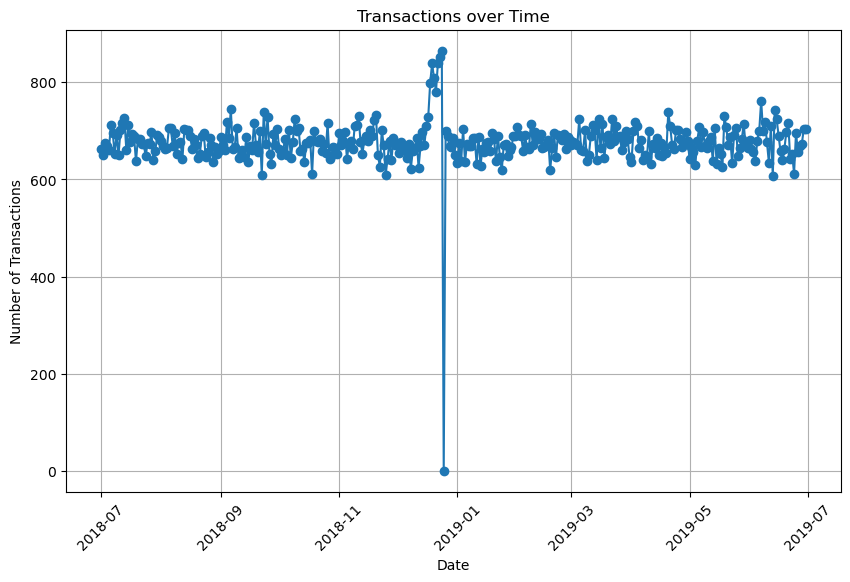

In [138]:
import matplotlib.pyplot as plt

# Створення послідовності всіх дат від 1 липня 2018 року до 30 червня 2019 року
all_dates = pd.date_range(start='2018-07-01', end='2019-06-30')

# Створення DataFrame з усіма датами
all_dates_df = pd.DataFrame({'DATE': all_dates})

# Об'єднання DataFrame з усіма датами та DataFrame з кількістю транзакцій за кожен день
merged_data = pd.merge(all_dates_df, transactions_by_day, on='DATE', how='left')

# Заповнення пропущених значень кількості транзакцій нулями
merged_data['N'].fillna(0, inplace=True)

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(merged_data['DATE'], merged_data['N'], marker='o', linestyle='-')
plt.title('Transactions over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Filter to December and look at individual days

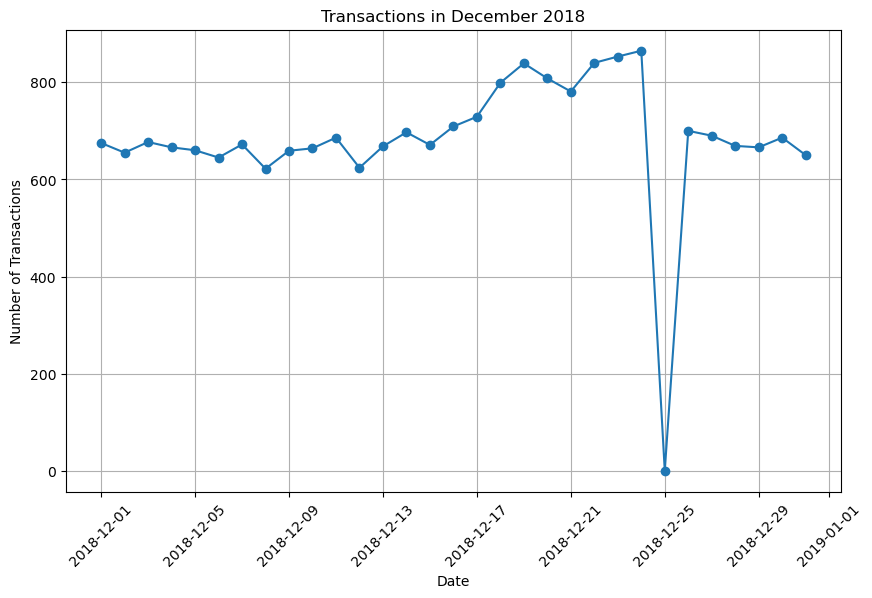

In [139]:
# Фільтрація даних за грудень
december_data = merged_data[(merged_data['DATE'] >= '2018-12-01') & (merged_data['DATE'] <= '2018-12-31')]

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(december_data['DATE'], december_data['N'], marker='o', linestyle='-')
plt.title('Transactions in December 2018')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

### Pack size

In [140]:
# Витягнення чисел з PROD_NAME
def parse_number(text):
    numbers = re.findall(r'\d+', text)
    if numbers:
        return int(numbers[0])
    else:
        return None

# Застосування функції parse_number до стовпця PROD_NAME
td['PACK_SIZE'] = td['PROD_NAME'].apply(parse_number)

# Перевірка результатів
td[['PROD_NAME', 'PACK_SIZE']].tail(20)

,PROD_NAME,PACK_SIZE
264816,Cobs Popd Sea Salt Chips 110g,110
264817,Sunbites Whlegrn Crisps FrchOnin 90g,90
264818,Infuzions SourCreamHerbs Veg Strws 110g,110
264819,Kettle Original 175g,175
264820,Pringles Mystery Flavour 134g,134
264821,Kettle Sea Salt And Vinegar 175g,175
264822,Pringles Slt Vingar 134g,134
264823,Kettle 135g Swt Pot Sea Salt,135
264824,Kettle Tortilla ChpsBtrootRicotta 150g,150
264825,Infuzions BBQ Rib Prawn Crackers 110g,110


In [141]:
td.groupby('PACK_SIZE').size().reset_index(name='N').sort_values(by='PACK_SIZE')

,PACK_SIZE,N
0,70,1507
1,90,3008
2,110,22387
3,125,1454
4,134,25102
5,135,3257
6,150,40203
7,160,2970
8,165,15297
9,170,19983


#### Plot a histogram showing the number of transactions by pack size.

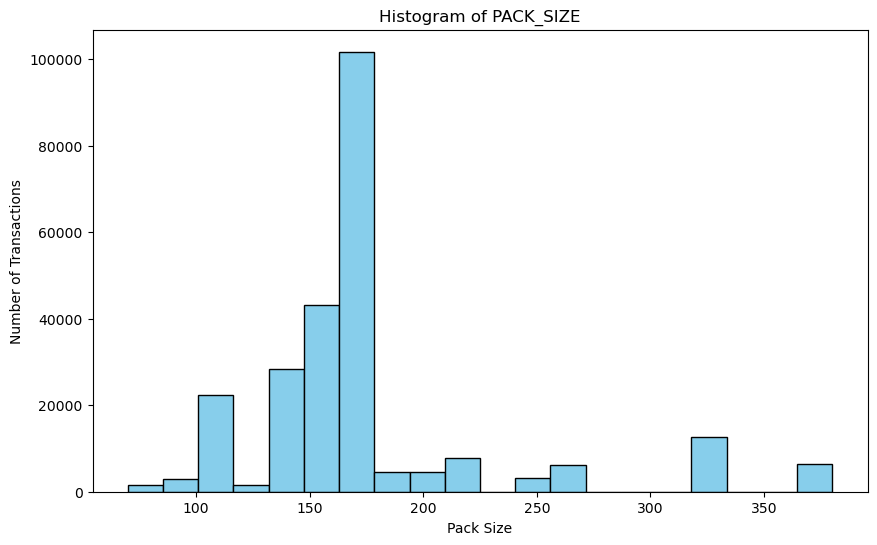

In [142]:
# Побудова гістограми
plt.figure(figsize=(10, 6))
plt.hist(td['PACK_SIZE'], bins=20, color='skyblue', edgecolor='black')

# Налаштування заголовка та осей
plt.title('Histogram of PACK_SIZE')
plt.xlabel('Pack Size')
plt.ylabel('Number of Transactions')

# Відображення графіка
plt.show()

### Brands

In [143]:
# Створення стовпця для назв брендів
td['BRAND'] = td['PROD_NAME'].apply(lambda x: x.split()[0])

# Перевірка результатів
td[['PROD_NAME', 'BRAND']].tail(10)

,PROD_NAME,BRAND
264826,Cobs Popd Sea Salt Chips 110g,Cobs
264827,Infuzions Thai SweetChili PotatoMix 110g,Infuzions
264828,Pringles Chicken Salt Crips 134g,Pringles
264829,Infuzions SourCreamHerbs Veg Strws 110g,Infuzions
264830,Thins Chips Light Tangy 175g,Thins
264831,Kettle Sweet Chilli And Sour Cream 175g,Kettle
264832,Tostitos Splash Of Lime 175g,Tostitos
264833,Doritos Mexicana 170g,Doritos
264834,Doritos Corn Chip Mexican Jalapeno 150g,Doritos
264835,Tostitos Splash Of Lime 175g,Tostitos


In [144]:
unique_brands = td['BRAND'].unique()
print(unique_brands)

['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'French' 'RRD' 'Tostitos'
 'Cheetos' 'Woolworths' 'Snbts' 'Sunbites']


In [145]:
# Виведення кількості унікальних брендів
unique_brands_count = td['BRAND'].nunique()
print("Кількість унікальних брендів:", unique_brands_count)

Кількість унікальних брендів: 28


In [146]:
unique_prodname = td['PROD_NAME'].unique()
print(unique_prodname)

['Natural Chip Compny SeaSalt175g' 'CCs Nacho Cheese 175g'
 'Smiths Crinkle Cut Chips Chicken 170g'
 'Smiths Chip Thinly SCreamOnion 175g'
 'Kettle Tortilla ChpsHnyJlpno Chili 150g'
 'Smiths Crinkle Chips Salt Vinegar 330g' 'Grain Waves Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour CreamChives 210G' 'Kettle Sensations Siracha Lime 150g'
 'Twisties Cheese 270g' 'WW Crinkle Cut Chicken 175g'
 'Thins Chips Light Tangy 175g' 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle Original 330g' 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt And Vinegar 175g' 'Smiths Chip Thinly Cut Original 175g'
 'Kettle Original 175g' 'Red Rock Deli Thai ChilliLime 150g'
 'Pringles Sthrn FriedChicken 134g' 'Pringles SweetSpcy BBQ 134g'
 'Thins Chips Originl saltd 175g' 'Red Rock Deli Sp Salt Truffle 150G'
 'Smiths Thinly Swt ChliSCream175G' 'Kettle Chi

#### Clean brand names

In [147]:
# Заміна значень брендів
td['BRAND'].replace({
    'RRD': 'Red Rock Deli',
    'Red': 'Red Rock Deli',
    'NCC': 'Natural ChipCo',
    'WW': 'Woolworths',
    'Snbts': 'Sunbites',
    'CCs': 'Corn Chips',
    'Natural': 'Natural ChipCo',
    'Grain': 'Grain Waves',
    'GrnWves': 'Grain Waves',
    'Infzns': 'Infuzions',
    'Dorito': 'Doritos',
    'French': 'French Fries'
}, inplace=True)

td[['PROD_NAME', 'BRAND']].tail(10)

,PROD_NAME,BRAND
264826,Cobs Popd Sea Salt Chips 110g,Cobs
264827,Infuzions Thai SweetChili PotatoMix 110g,Infuzions
264828,Pringles Chicken Salt Crips 134g,Pringles
264829,Infuzions SourCreamHerbs Veg Strws 110g,Infuzions
264830,Thins Chips Light Tangy 175g,Thins
264831,Kettle Sweet Chilli And Sour Cream 175g,Kettle
264832,Tostitos Splash Of Lime 175g,Tostitos
264833,Doritos Mexicana 170g,Doritos
264834,Doritos Corn Chip Mexican Jalapeno 150g,Doritos
264835,Tostitos Splash Of Lime 175g,Tostitos


In [148]:
unique_brands = td['BRAND'].unique()
print(unique_brands)

['Natural ChipCo' 'Corn Chips' 'Smiths' 'Kettle' 'Grain Waves' 'Doritos'
 'Twisties' 'Woolworths' 'Thins' 'Burger' 'Cheezels' 'Infuzions'
 'Red Rock Deli' 'Pringles' 'Smith' 'Tyrrells' 'Cobs' 'French Fries'
 'Tostitos' 'Cheetos' 'Sunbites']


In [149]:
# Виведення кількості унікальних брендів
unique_brands_count = td['BRAND'].nunique()
print("Кількість унікальних брендів:", unique_brands_count)

Кількість унікальних брендів: 21


### Examining customer data

In [150]:
# Статистика та розподіл ключових стовпців
pb.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [151]:
# Перевірка пропущених значень
pb.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [152]:
# Розподіл категоріальних стовпців
pb['LIFESTAGE'].value_counts()
pb['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

### Merge transaction data to customer data

In [153]:
# Злиття даних про транзакції з даними про клієнтів
merged_data = pd.merge(td, pb, on='LYLTY_CARD_NBR', how='left')
merged_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural ChipCo,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,Corn Chips,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [154]:
# Перевірка наявності пропущених даних про клієнтів
missing_customers = merged_data[merged_data['LIFESTAGE'].isnull() | merged_data['PREMIUM_CUSTOMER'].isnull()]

# Виведення результатів
print("Кількість транзакцій без відповідного клієнта:", len(missing_customers))
print("Транзакції без відповідного клієнта:")
print(missing_customers)

Кількість транзакцій без відповідного клієнта: 0
Транзакції без відповідного клієнта:
Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, PACK_SIZE, BRAND, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []


In [155]:
# Збереження даних у CSV файл
merged_data.to_csv('merged_data.csv', index=False)

## Data analysis on customer segments

In [156]:
# Згрупувати дані за 'LIFESTAGE' та 'PREMIUM_CUSTOMER' і розрахувати загальні продажі
customer_sales = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
customer_sales

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,33345.70
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25
2,MIDAGE SINGLES/COUPLES,Premium,54443.85
3,NEW FAMILIES,Budget,20607.45
4,NEW FAMILIES,Mainstream,15979.70
5,NEW FAMILIES,Premium,10760.80
6,OLDER FAMILIES,Budget,156863.75
7,OLDER FAMILIES,Mainstream,96413.55
8,OLDER FAMILIES,Premium,75242.60
9,OLDER SINGLES/COUPLES,Budget,127833.60


In [157]:
# Знайти групу з найвищими загальними продажами
max_sales_group = customer_sales.loc[customer_sales['TOT_SALES'].idxmax()]

print("Сегмент клієнтів з найвищими загальними продажами:")
print(max_sales_group)

Сегмент клієнтів з найвищими загальними продажами:
LIFESTAGE           OLDER FAMILIES
PREMIUM_CUSTOMER            Budget
TOT_SALES                156863.75
Name: 6, dtype: object


In [158]:
# Знайти групу з найвищими загальними продажами
min_sales_group = customer_sales.loc[customer_sales['TOT_SALES'].idxmin()]

print("Сегмент клієнтів з найменшими загальними продажами:")
print(min_sales_group)

Сегмент клієнтів з найменшими загальними продажами:
LIFESTAGE           NEW FAMILIES
PREMIUM_CUSTOMER         Premium
TOT_SALES                10760.8
Name: 5, dtype: object


In [159]:
# Підрахунок кількості клієнтів у кожному сегменті
segment_counts = pb['LIFESTAGE'].value_counts()

print("Кількість клієнтів у кожному сегменті:")
print(segment_counts)

Кількість клієнтів у кожному сегменті:
LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64


In [160]:
# Обчислення загальної кількості чіпсів, куплених кожним клієнтом
chips_per_customer = merged_data.groupby('LYLTY_CARD_NBR')['PROD_QTY'].sum()

# Підрахунок кількості клієнтів у кожному сегменті
customer_counts = merged_data['LIFESTAGE'].value_counts()

# Обчислення кількості чіпсів, куплених кожним клієнтом за сегментами
chips_per_segment = chips_per_customer.groupby(merged_data['LIFESTAGE']).mean().round(1)

# Сортування від більшого до меншого
chips_per_segment_sorted = chips_per_segment.sort_values(ascending=False)

print("Кількість чіпсів, куплених кожним клієнтом за сегментами:")
print(chips_per_segment_sorted)

Кількість чіпсів, куплених кожним клієнтом за сегментами:
LIFESTAGE
OLDER SINGLES/COUPLES     7.3
YOUNG SINGLES/COUPLES     6.9
OLDER FAMILIES            6.8
RETIREES                  6.7
YOUNG FAMILIES            6.6
NEW FAMILIES              6.5
MIDAGE SINGLES/COUPLES    5.3
Name: PROD_QTY, dtype: float64


In [161]:
# Обчислення ціни чіпсів для кожної транзакції
merged_data['CHIP_PRICE'] = merged_data['TOT_SALES'] / merged_data['PROD_QTY']

# Обчислення середньої ціни чіпсів за кожним сегментом клієнтів
average_price_per_segment = merged_data.groupby('LIFESTAGE')['CHIP_PRICE'].mean().round(2)

# Сортування від більшого до меншого
average_price_per_segment_sorted = average_price_per_segment.sort_values(ascending=False)

# Виведення середньої ціни чіпсів за кожним сегментом клієнтів
print("Середня ціна чіпсів за кожним сегментом клієнтів:")
print(average_price_per_segment_sorted)

Середня ціна чіпсів за кожним сегментом клієнтів:
LIFESTAGE
NEW FAMILIES              3.91
RETIREES                  3.89
YOUNG SINGLES/COUPLES     3.89
MIDAGE SINGLES/COUPLES    3.87
OLDER SINGLES/COUPLES     3.86
YOUNG FAMILIES            3.75
OLDER FAMILIES            3.74
Name: CHIP_PRICE, dtype: float64


In [162]:
# Розрахунок загальних витрат клієнта за весь період
total_spend_per_customer = merged_data.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum()

# Сортування від більшого до меншого
total_spend_per_customer_sorted = total_spend_per_customer.sort_values(ascending=False)

# Виведення результатів
print("Загальні витрати клієнта за весь період:")
print(total_spend_per_customer_sorted)

Загальні витрати клієнта за весь період:
LYLTY_CARD_NBR
230078    138.6
58361     124.8
63197     122.6
162039    121.6
179228    120.8
          ...  
74339       1.7
120143      1.7
18102       1.7
74329       1.7
50201       1.7
Name: TOT_SALES, Length: 71287, dtype: float64


In [163]:
# Розрахунок відношення витрат на чіпси до загальних витрат для кожної транзакції
merged_data['CHIPS_SPEND_RATIO'] = merged_data['TOT_SALES'] / total_spend_per_customer[merged_data['LYLTY_CARD_NBR']].values

merged_data['CHIPS_SPEND_RATIO'] = merged_data['CHIPS_SPEND_RATIO'].round(2)

print("\nВідношення витрат на чіпси до загальних витрат для кожної транзакції:")
merged_data[['LYLTY_CARD_NBR', 'TXN_ID', 'CHIPS_SPEND_RATIO']]


Відношення витрат на чіпси до загальних витрат для кожної транзакції:


,LYLTY_CARD_NBR,TXN_ID,CHIPS_SPEND_RATIO
0,1000,1,1.00
1,1307,348,0.52
2,1343,383,1.00
3,2373,974,1.00
4,2426,1038,1.00
...,...,...,...
246735,272319,270088,0.62
246736,272358,270154,1.00
246737,272379,270187,0.53
246738,272379,270188,0.47


In [164]:
# Підрахувати кількість клієнтів у кожному сегменті
segment_counts = merged_data['LIFESTAGE'].value_counts()

# Підрахувати загальну кількість клієнтів
total_customers = segment_counts.sum()

# Розрахувати частку клієнтів у кожному сегменті
proportion_customers = (segment_counts / total_customers)*100

proportion_customers = proportion_customers.astype(int)

# Вивести частку клієнтів у кожному сегменті
print("Частка клієнтів у кожному сегменті, %:")
print(proportion_customers)

Частка клієнтів у кожному сегменті, %:
LIFESTAGE
OLDER SINGLES/COUPLES     20
RETIREES                  18
OLDER FAMILIES            18
YOUNG FAMILIES            16
YOUNG SINGLES/COUPLES     13
MIDAGE SINGLES/COUPLES     9
NEW FAMILIES               2
Name: count, dtype: int64


#### Total sales by LIFESTAGE and PREMIUM_CUSTOMER

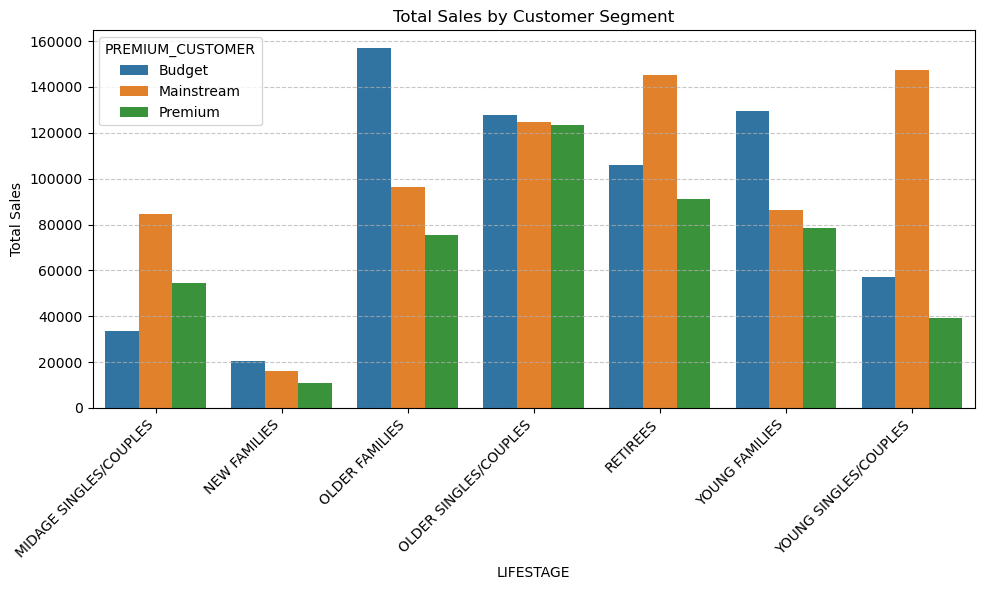

In [165]:
import seaborn as sns

# Розрахунок загальних продажів за кожним сегментом
total_sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Побудова графіку
plt.figure(figsize=(10, 6))
sns.barplot(data=total_sales_by_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Total Sales')
plt.title('Total Sales by Customer Segment')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

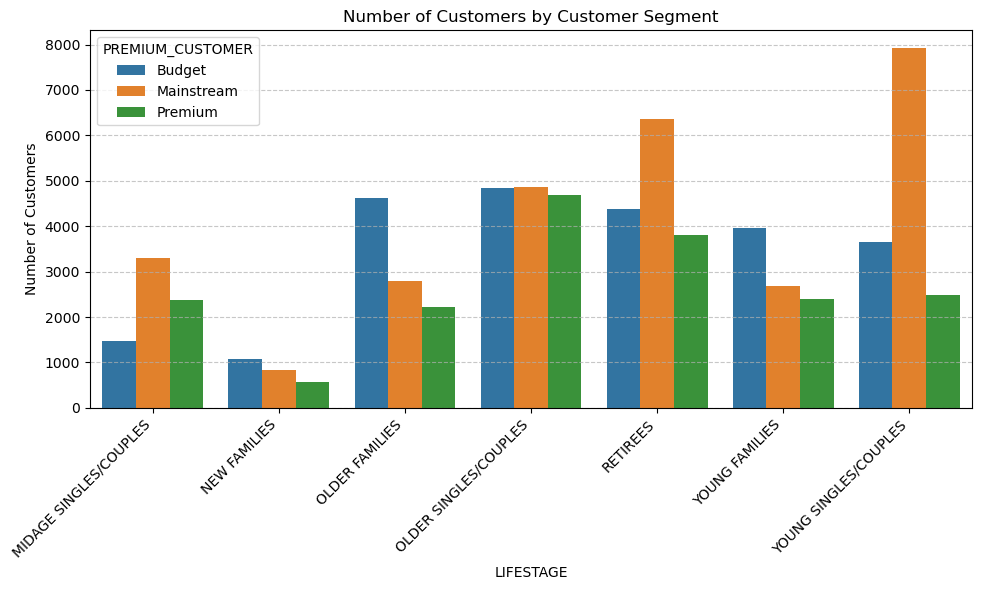

In [166]:
# Розрахунок кількості клієнтів за кожними вимірами
customer_counts_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Побудова графіку
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_counts_by_segment, x='LIFESTAGE', y='LYLTY_CARD_NBR', hue='PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Customer Segment')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.
#### Higher sales may also be driven by more units of chips being bought per customer. Let's have a look at this next.


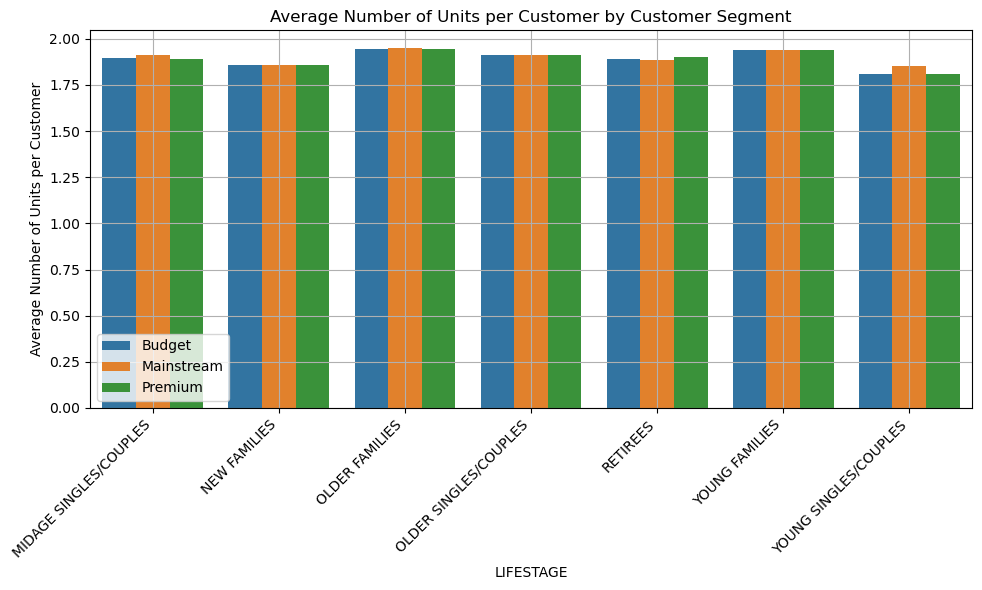

In [167]:
# Розрахунок середньої кількості одиниць товару на клієнта за різними сегментами споживачів
avg_units_per_customer = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

# Побудова графіку з легендою у правому нижньому куті
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_units_per_customer, x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER')
plt.legend(loc='lower left')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Number of Units per Customer')
plt.title('Average Number of Units per Customer by Customer Segment')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Older families and young families in general buy more chips per customer

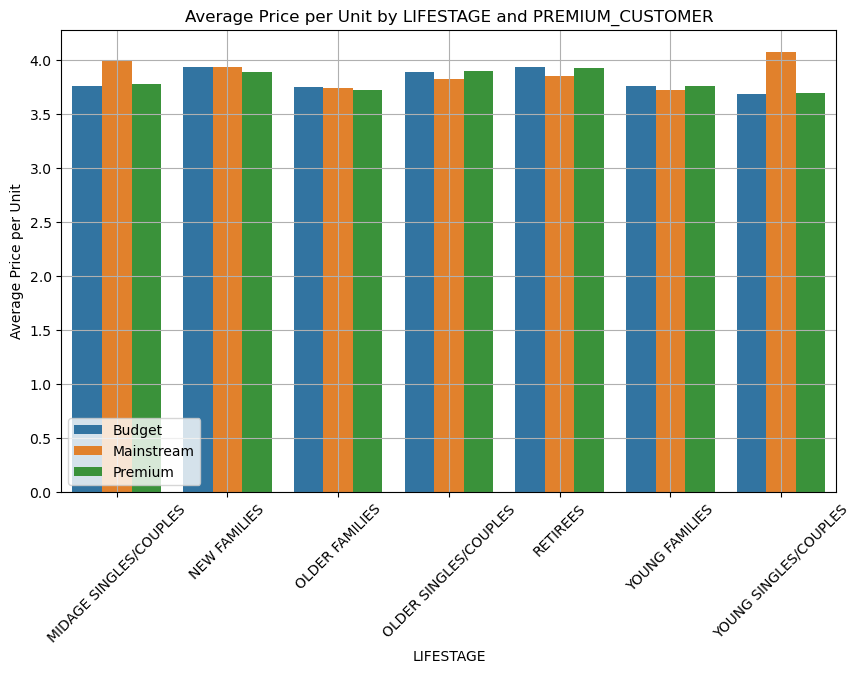

In [168]:
# Розрахунок середньої ціни за одиницю
avg_price_per_unit = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum() / merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()

# Побудова графіка середньої ціни за одиницю для кожного сегмента клієнтів
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_per_unit.reset_index(), x='LIFESTAGE', y=0, hue='PREMIUM_CUSTOMER')
plt.title('Average Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Price per Unit')
plt.xticks(rotation=45)
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

#### Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. 
#### This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

In [169]:
from scipy.stats import ttest_ind

# Розділення даних на групи для порівняння
mainstream = merged_data[(merged_data['PREMIUM_CUSTOMER'] == 'Mainstream') & 
                         ((merged_data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | 
                          (merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES'))]['TOT_SALES']
premium_budget = merged_data[((merged_data['PREMIUM_CUSTOMER'] == 'Premium') | 
                               (merged_data['PREMIUM_CUSTOMER'] == 'Budget')) & 
                              ((merged_data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | 
                               (merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES'))]['TOT_SALES']

# Виконання t-тесту
t_stat, p_val = ttest_ind(mainstream, premium_budget)
print("t-статистика:", t_stat)
print("p-значення:", p_val)

if p_val < 0.05:
    print("Різниця статистично значима")
else:
    print("Різниця не статистично значима")

t-статистика: 33.200521751400586
p-значення: 1.9916804791117584e-239
Різниця статистично значима


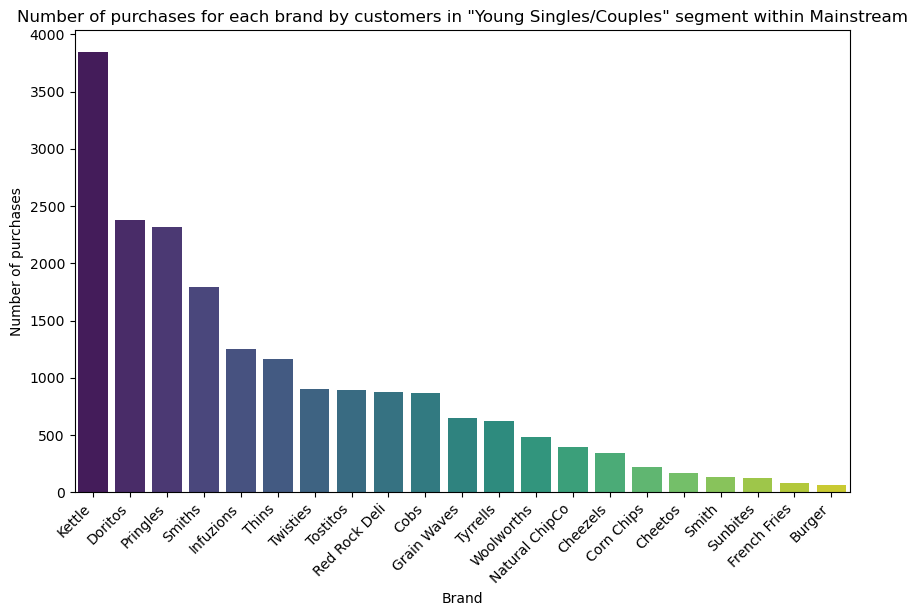

In [170]:
# Підгрупування даних для глибшого аналізу
mainstream_young = merged_data[(merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & 
                               (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Обчислення кількості покупок для кожного бренду
brand_counts = mainstream_young['BRAND'].value_counts().reset_index()
brand_counts.columns = ['BRAND', 'COUNT']

# Побудова стовпчикової діаграми для відображення кількості покупок кожного бренду
plt.figure(figsize=(10, 6))
sns.barplot(data=brand_counts, x='BRAND', y='COUNT', palette='viridis')
plt.title('Number of purchases for each brand by customers in "Young Singles/Couples" segment within Mainstream')
plt.xlabel('Brand')
plt.ylabel('Number of purchases')
plt.xticks(rotation=45, ha='right')
plt.show()

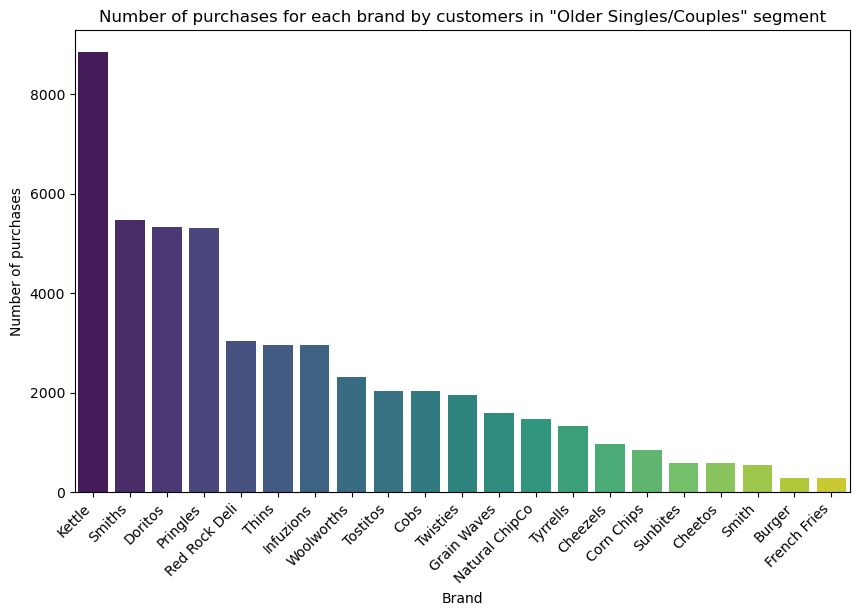

In [171]:
# Subsetting the data for deeper analysis
older_singles_couples = merged_data[(merged_data['LIFESTAGE'] == 'OLDER SINGLES/COUPLES')]

# Calculating the number of purchases for each brand
brand_counts_older = older_singles_couples['BRAND'].value_counts().reset_index()
brand_counts_older.columns = ['BRAND', 'COUNT']

# Plotting a bar chart to show the number of purchases for each brand
plt.figure(figsize=(10, 6))
sns.barplot(data=brand_counts_older, x='BRAND', y='COUNT', palette='viridis')
plt.title('Number of purchases for each brand by customers in "Older Singles/Couples" segment')
plt.xlabel('Brand')
plt.ylabel('Number of purchases')
plt.xticks(rotation=45, ha='right')
plt.show()